In [2]:
pwd

'/Users/robsalter'

In [4]:
cd /Users/robsalter/Desktop/Dataquest/New Project

/Users/robsalter/Desktop/Dataquest/New Project


In [6]:
pwd

'/Users/robsalter/Desktop/Dataquest/New Project'

# Guided Project: Visualizing Earnings Based On College Majors

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.
    
## Importing Libraries And Reading In The Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
recent_grads = pd.read_csv('/Users/robsalter/Desktop/Dataquest/New Project/recent-grads.csv')
# Exploring the dataset
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [15]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [18]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [21]:
# Summary statistics, numerical rows
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [25]:
# Look up the number of rows in recent_grads and assign the value to raw_data_count.
raw_data_count = recent_grads.shape
print(raw_data_count)

(173, 21)


In [28]:
# Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.

recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape
print(cleaned_data_count)
#Removed 1 row with missing values

(172, 21)


Text(0, 0.5, 'Median salary')

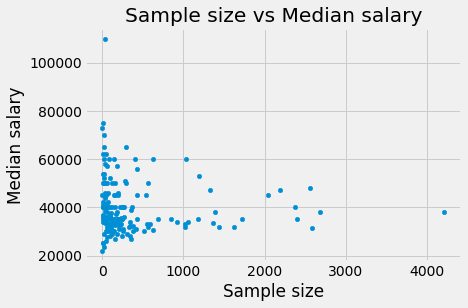

In [50]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Sample_size', y='Median', title='Sample size vs Median salary', kind='scatter')
plt.xlabel('Sample size')
plt.ylabel('Median salary')

Text(0, 0.5, 'Unemployment rate')

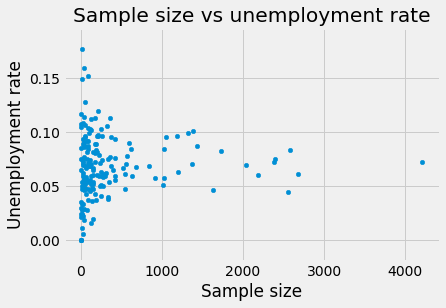

In [37]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Sample_size', y='Unemployment_rate', title='Sample size vs unemployment rate', kind='scatter')
plt.xlabel('Sample size')
plt.ylabel('Unemployment rate')

Text(0, 0.5, 'Median salary')

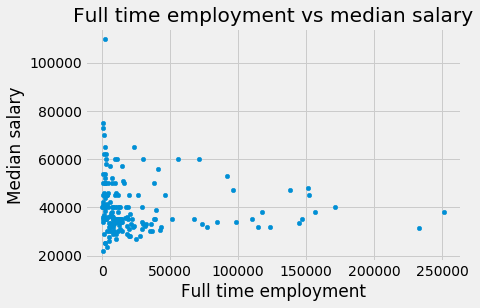

In [51]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Full_time', y='Median', title = 'Full time employment vs median salary', kind='scatter')
plt.xlabel('Full time employment')
plt.ylabel('Median salary')

Text(0, 0.5, 'Unemployment rate')

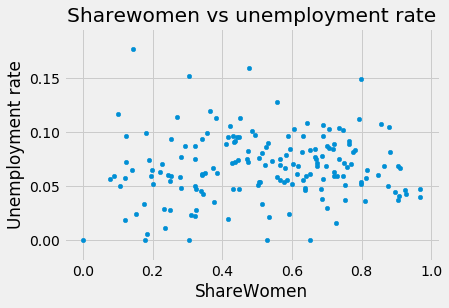

In [43]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', title='Sharewomen vs unemployment rate', kind='scatter')
plt.ylabel('Unemployment rate')

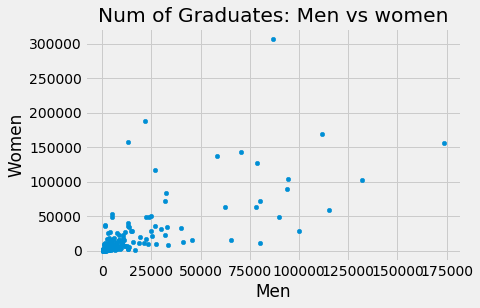

In [46]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Men', y='Women', title= 'Num of Graduates: Men vs women', kind='scatter')


Text(0, 0.5, 'Median salary')

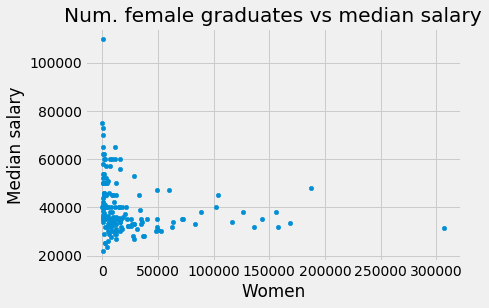

In [53]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Women', y='Median', title='Num. female graduates vs median salary', kind='scatter')
plt.ylabel('Median salary')


Text(0, 0.5, 'Median income')

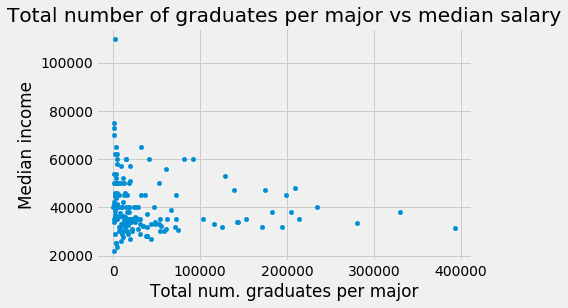

In [55]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='Total', y='Median', title='Total number of graduates per major vs median salary', kind='scatter')
plt.xlabel('Total num. graduates per major')
plt.ylabel('Median income')
                  

Text(0, 0.5, 'Median salary')

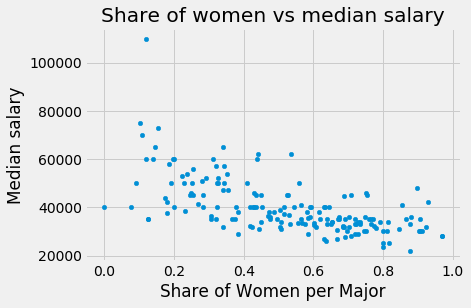

In [57]:
plt.style.use('fivethirtyeight')
recent_grads.plot(x='ShareWomen', y='Median', title='Share of women vs median salary', kind='scatter')
plt.xlabel('Share of women per Major')
plt.ylabel('Median salary')

## Findings


- Do students in more popular majors make more money?

From our plots, we cannot determine that students in more popular majors make more money. Majors with larger sample sizes seem to in fact make less money. This has been concluded when comparing the total number of graduates per majors vs the median income for each major. It would appear that majors with a smaller sample size or total number of gradutaes have a larger distribution with no clear correlation so far. 


    
- Do students that majored in subjects that were majority female make more money?

No. When comparing the median salary with the share of women per major, we can see that the subjects that feature a minority of women generally have a higher median income. Majors with a majority of female graduates generally have a lower median salary.


- Is there any link between the number of full-time employees and median salary?

Full time employment seems to correlate with a lower median salary.

## Generating Histograms By Column


Text(0.5, 1.0, 'Frequency distribution of sample size')

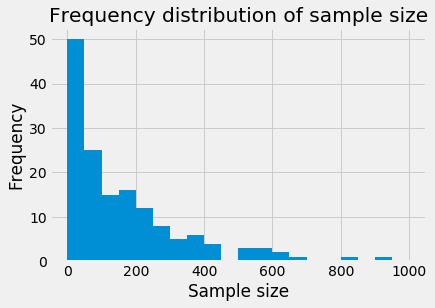

In [83]:
from numpy import arange
plt.style.use('fivethirtyeight')
recent_grads['Sample_size'].hist(bins = 20, range=(0,1000))
plt.xlabel('Sample size')
plt.ylabel('Frequency')
plt.title('Frequency distribution of sample size')

The distribution is heavily right skewed. The majority of majors feature a sample size of less than 100. This small sample size for each majort may lead to extreme values which could explain the large distrubtion of values within the smaller sampled majors.

Text(0, 0.5, 'Frequency')

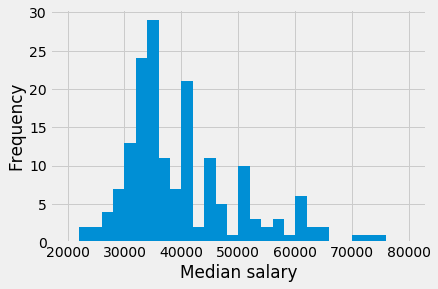

In [95]:
plt.style.use('fivethirtyeight')
recent_grads['Median'].hist(bins=30,range=(20000,80000))
plt.xlabel('Median salary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

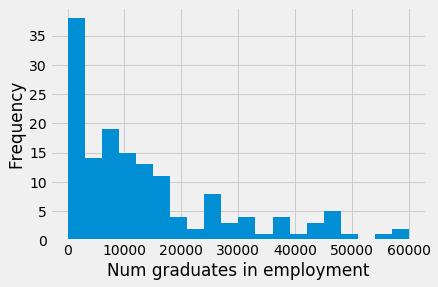

In [102]:
plt.style.use('fivethirtyeight')
recent_grads['Employed'].hist(bins=20,range=(0,60000))
plt.xlabel('Num graduates in employment')
plt.ylabel('Frequency')

The number of graduates in employment is heavily right skewed. Further investigation is needed to find any causes for this distribution.

Text(0, 0.5, 'Frequency')

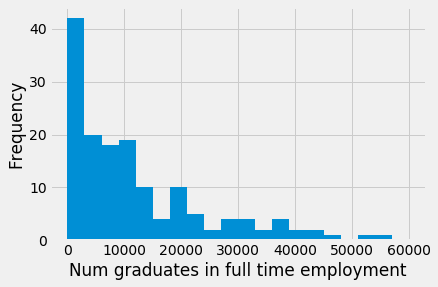

In [104]:
plt.style.use('fivethirtyeight')
recent_grads['Full_time'].hist(bins=20,range=(0,60000))
plt.xlabel('Num graduates in full time employment')
plt.ylabel('Frequency')

A similar distribtion to the employment histogram which would imply that full time employment is the most common type fo employment.

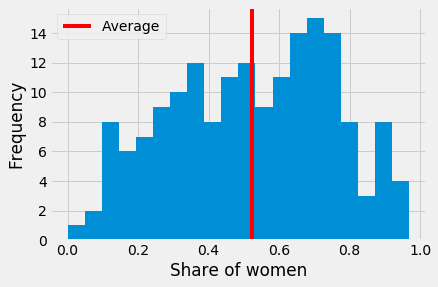

In [133]:
plt.style.use('fivethirtyeight')
recent_grads['ShareWomen'].hist(bins=20)
plt.xlabel('Share of women')
plt.ylabel('Frequency')
plt.axvline(recent_grads['ShareWomen'].mean(), color='red', label='Average')
plt.legend()

Text(0, 0.5, 'Frequency')

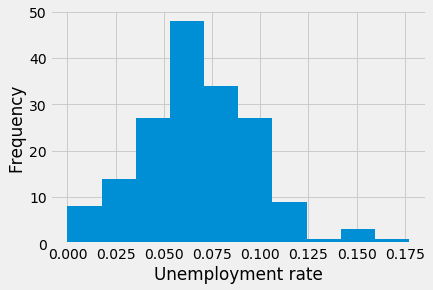

In [127]:
plt.style.use('fivethirtyeight')
recent_grads['Unemployment_rate'].hist(bins=10)
plt.xlabel('Unemployment rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

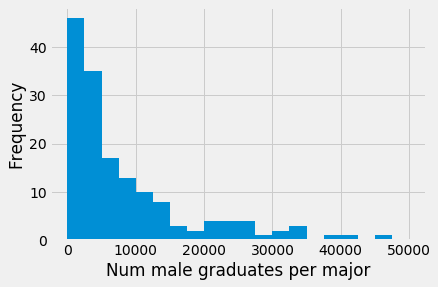

In [119]:
plt.style.use('fivethirtyeight')
recent_grads['Men'].hist(bins=20, range=(0,50000))
plt.xlabel('Num male graduates per major')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

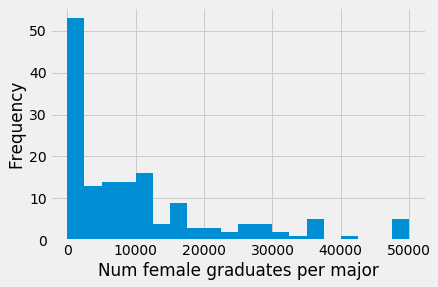

In [126]:
plt.style.use('fivethirtyeight')
recent_grads['Women'].hist(bins=20, range=(0,50000))
plt.xlabel('Num female graduates per major')
plt.ylabel('Frequency')

## Findings 


- What percent of majors are predominantly male? Predominantly female?

The mean distribution shows that just over half of majors are predominately male.


- What's the most common median salary range?

The distribution is skewed toward the right with the most common median salaries are around USD33,000 to USD35,000.

## Scatter Matrices

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.


Text(0.5, 2.07, 'Scatter matrix exploring the relationship between sample size and median salary')

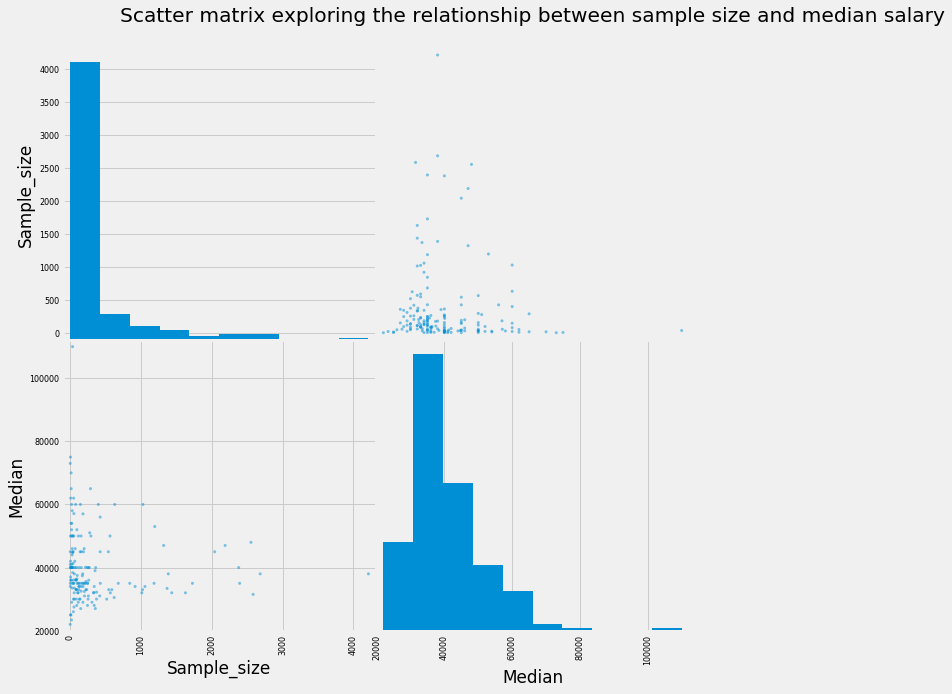

In [151]:
from pandas.plotting import scatter_matrix

plt.style.use('fivethirtyeight')
scatter_matrix(recent_grads[['Sample_size','Median']], figsize= (10,10))
plt.title('Scatter matrix exploring the relationship between sample size and median salary', y=2.07)




The larger sample sizes correlate with a median salary between approximately 30,000 - 50,000 dollars which suggest. Sample size may therefore likely impacting our data on median income. The most common sample sizes are less than 100 receipents which would not be a good approximation of the whole population.

Text(0.5, 3.07, 'Scatter matrix exploring the relationship between sample size, median salary and unemployment rate')

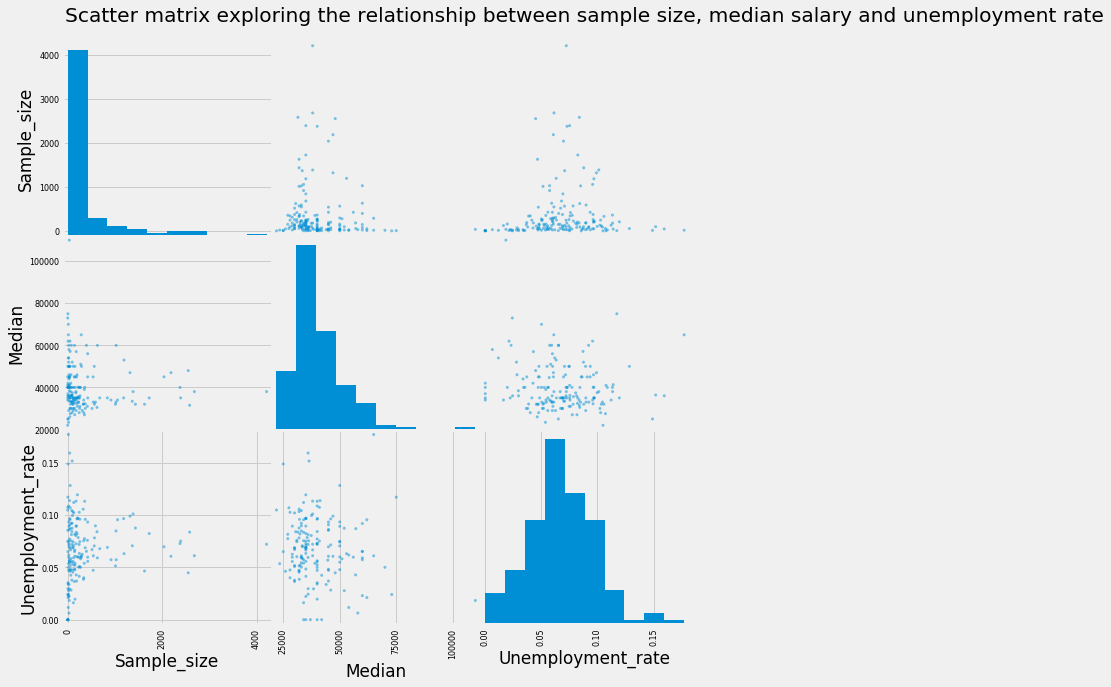

In [153]:
plt.style.use('fivethirtyeight')
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
plt.title('Scatter matrix exploring the relationship between sample size, median salary and unemployment rate', y=3.07)


No correlations can be found between the unemployment rate and median salary/sample size.

## Comparing The Percentages Of Women By Major Popularity

Text(0.5, 0, '')

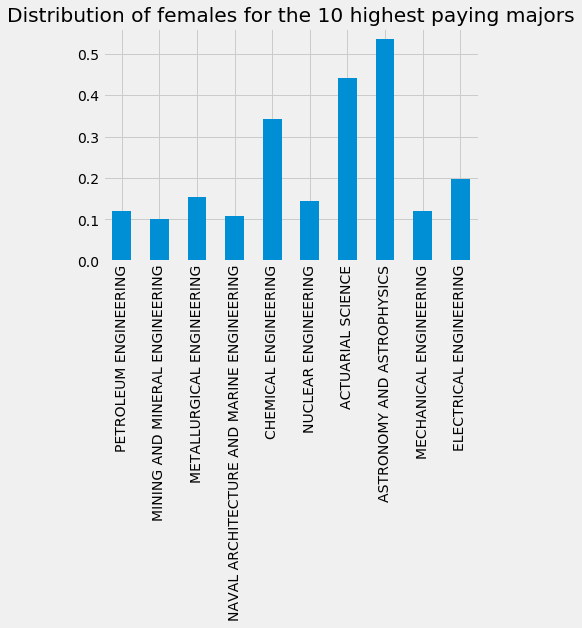

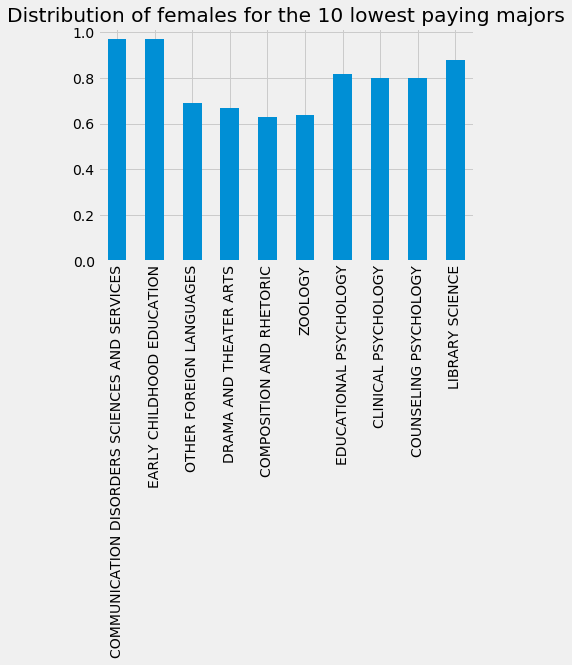

In [164]:
plt.style.use('fivethirtyeight')

recent_grads[:10].plot.bar(x='Major', y='ShareWomen', title = 'Distribution of females for the 10 highest paying majors', legend=None)
plt.xlabel('')
recent_grads[162:].plot.bar(x='Major', y='ShareWomen', title = 'Distribution of females for the 10 lowest paying majors', legend=None)
plt.xlabel('')

Text(0.5, 0, '')

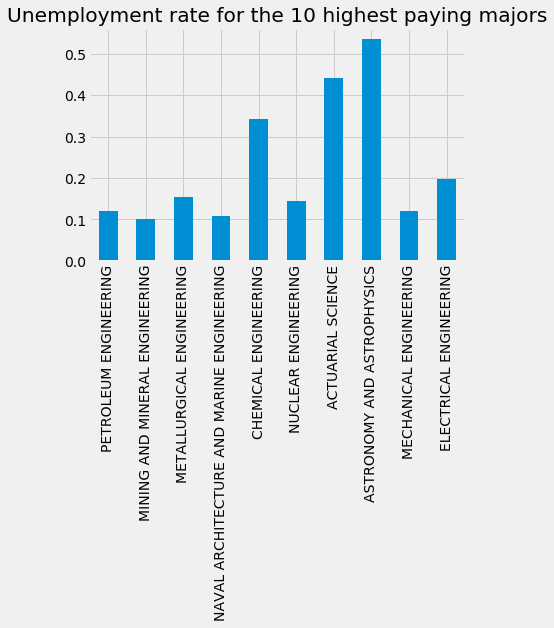

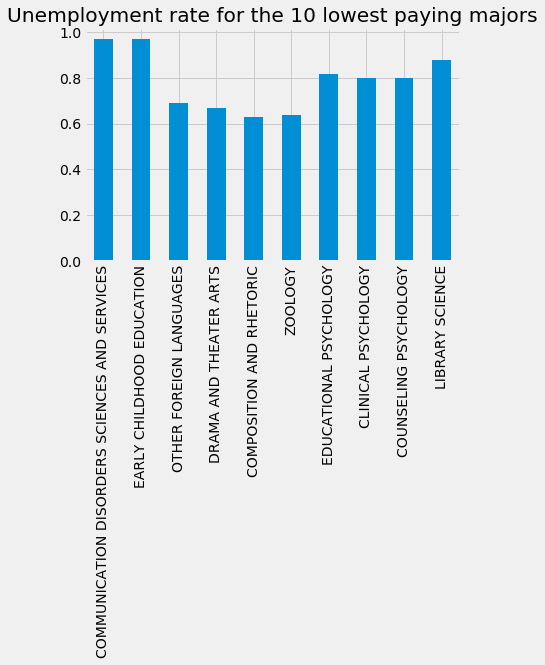

In [169]:
plt.style.use('fivethirtyeight')
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', title = 'Unemployment rate for the 10 highest paying majors', legend=None )
plt.xlabel('')
recent_grads[162:].plot.bar(x='Major', y='ShareWomen', title = 'Unemployment rate for the 10 lowest paying majors', legend=None )
plt.xlabel('')


## Conclusion

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes.